In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Instala las bibliotecas si no están instaladas
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.ensemble as skl
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score




# Carga el conjunto de datos desde tu archivo CSV
dataset = pd.read_csv('/content/drive/MyDrive/retail_sales_dataset.csv')

# Resumen estadístico básico
summary = dataset.describe()
print("Resumen estadístico básico:")
print(summary)




Resumen estadístico básico:
       Transaction ID         Age     Quantity  Price per Unit  Total Amount
count     1000.000000  1000.00000  1000.000000     1000.000000   1000.000000
mean       500.500000    41.39200     2.514000      179.890000    456.000000
std        288.819436    13.68143     1.132734      189.681356    559.997632
min          1.000000    18.00000     1.000000       25.000000     25.000000
25%        250.750000    29.00000     1.000000       30.000000     60.000000
50%        500.500000    42.00000     3.000000       50.000000    135.000000
75%        750.250000    53.00000     4.000000      300.000000    900.000000
max       1000.000000    64.00000     4.000000      500.000000   2000.000000


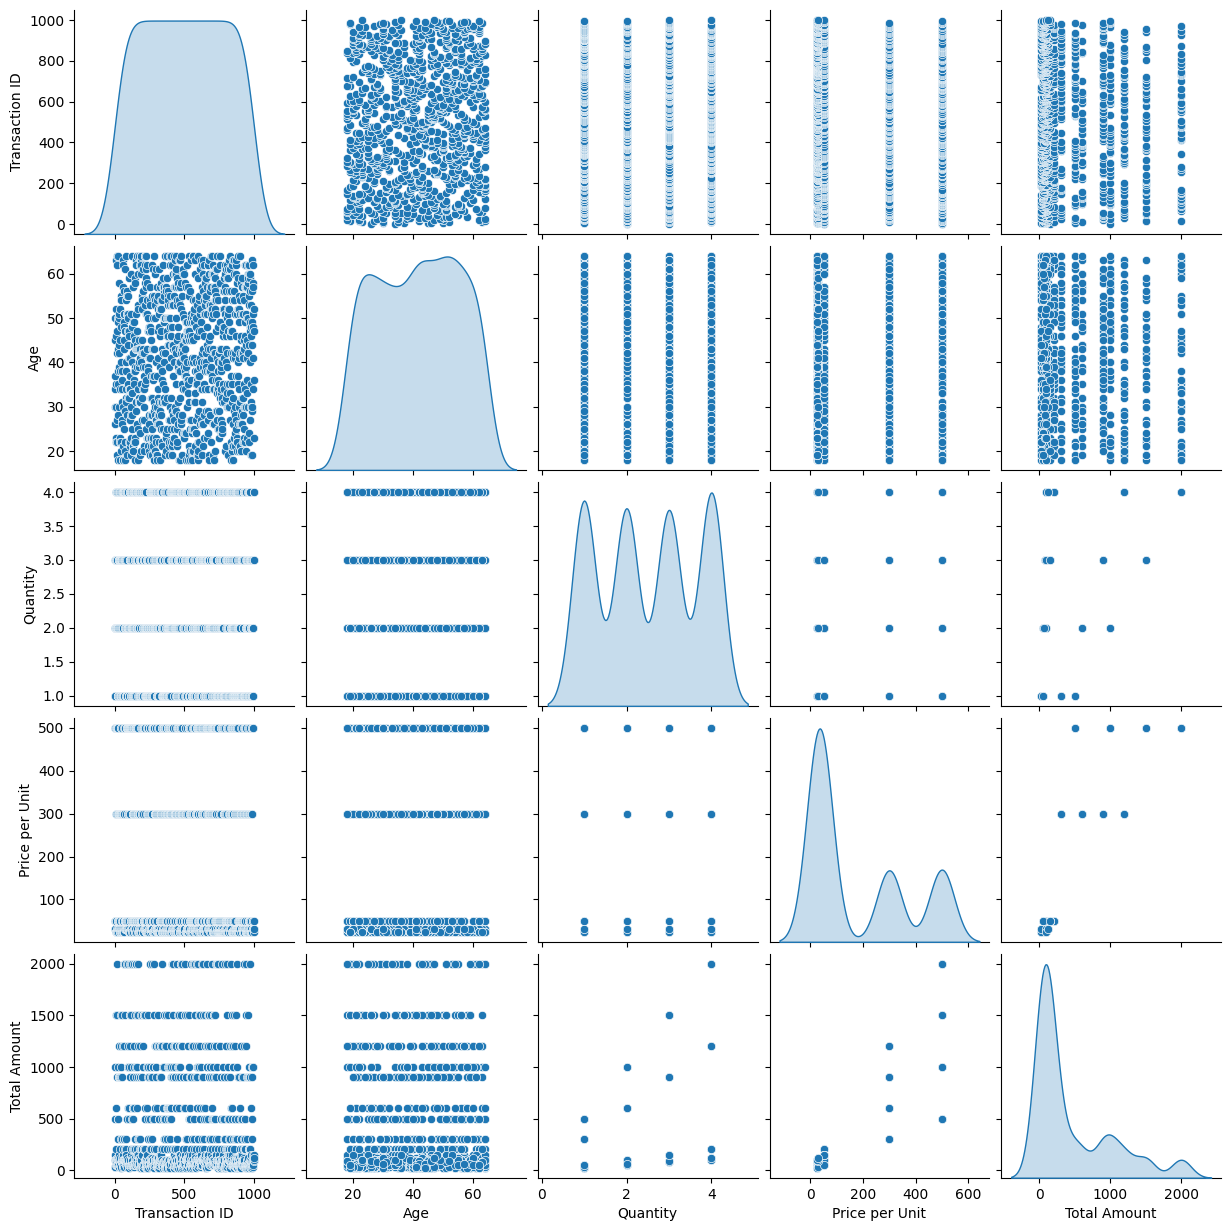

<ipython-input-6-7515bd4f3624>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = dataset.corr()


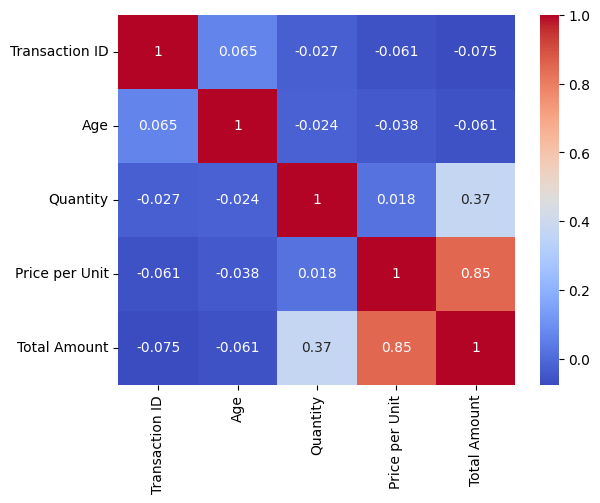

In [ ]:

# EJERCICIO 2
# Visualizar la distribución de los atributos numéricos
sns.pairplot(dataset, diag_kind='kde')
plt.show()

# Visualizar la correlación entre los atributos numéricos
correlation_matrix = dataset.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


In [ ]:
#EJERCICIO 4
# Definir las características (X) y la variable objetivo (y)
X = dataset.drop(columns=['Quantity'])  # Ajusta 'target' al nombre real de tu variable objetivo
y = dataset['Quantity']

# Realizar la división en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# El argumento 'random_state' permite fijar una semilla para que la división sea reproducible

# Verificar las dimensiones de los conjuntos resultantes
print("Tamaño del conjunto de entrenamiento (X_train):", X_train.shape)
print("Tamaño del conjunto de prueba (X_test):", X_test.shape)
print("Tamaño del conjunto de entrenamiento (y_train):", y_train.shape)
print("Tamaño del conjunto de prueba (y_test):", y_test.shape)


Tamaño del conjunto de entrenamiento (X_train): (800, 8)
Tamaño del conjunto de prueba (X_test): (200, 8)
Tamaño del conjunto de entrenamiento (y_train): (800,)
Tamaño del conjunto de prueba (y_test): (200,)


In [ ]:
#EJERCICIO 5
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Carga el conjunto de datos desde tu archivo CSV
dataset = pd.read_csv('/content/drive/MyDrive/retail_sales_dataset.csv')

# Convertir la fecha a timestamp
dataset['Date_timestamp'] = pd.to_datetime(dataset['Date']).apply(lambda x: x.timestamp())

# Eliminar la columna original 'Date'
dataset.drop('Date', axis=1, inplace=True)

# Supongamos que 'y' son las etiquetas correspondientes
X = dataset.drop(['Total Amount', 'Transaction ID', 'Customer ID'], axis=1)  # Seleccionar las características
X = pd.get_dummies(X)  # One-hot encode categorical columns

y = dataset['Total Amount']  # Seleccionar las etiquetas

# Realizar partición en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear un modelo de regresión lineal
linear_regression_model = LinearRegression()

# Entrenar el modelo de regresión lineal con los datos de entrenamiento
linear_regression_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred_linear = linear_regression_model.predict(X_test)

# Calcular el MSE y R² en el conjunto de prueba
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print("Modelo de Regresión Lineal:")
print(f"Mean Squared Error (MSE): {mse_linear}")
print(f"R² Score: {r2_linear}")


Modelo de Regresión Lineal:
Mean Squared Error (MSE): 42008.14267653278
R² Score: 0.8564948612220885


In [ ]:
# Crear un modelo de Árbol de Decisión con hiperparámetros personalizados
tree_model = DecisionTreeRegressor(max_depth=1, min_samples_split=3, min_samples_leaf=2)

# Entrenar el modelo de Árbol de Decisión con los datos de entrenamiento
tree_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred_tree = tree_model.predict(X_test)

# Calcular el MSE y R² en el conjunto de prueba
mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

print("Modelo de Árbol de Decisión:")
print(f"Mean Squared Error (MSE): {mse_tree}")
print(f"R² Score: {r2_tree}")

#Responder: ¿Que formas tienen de evaluar los resultados de cada árbol de decisión? ¿Como eligen "el mejor árbol"? ¿Como se comparan los resultados de los modelos de regresión lineal y de árbol de decisión?

#Responder:::

Modelo de Árbol de Decisión:
Mean Squared Error (MSE): 107582.91781597212
R² Score: 0.6324831195181992


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Cargar el conjunto de datos desde tu archivo CSV
dataset = pd.read_csv('/content/drive/MyDrive/retail_sales_dataset.csv')  # Reemplaza con tu propio archivo

# Preprocesar los datos y seleccionar características (X) y etiquetas (y)
X = dataset.drop(['Gender'], axis=1)  # Suponiendo que 'target' es la columna a predecir
X = pd.get_dummies(X)  # Codificar variables categóricas si es necesario
y = dataset['Gender']

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de Logistic Regression
logistic_model = LogisticRegression()

# Entrenar el modelo
logistic_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred_logistic = logistic_model.predict(X_test)

# Calcular la precisión y mostrar el reporte de clasificación
accuracy = accuracy_score(y_test, y_pred_logistic)
print("Modelo de Logistic Regression:")
print(f"Precisión: {accuracy}")
print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred_logistic))


Modelo de Logistic Regression:
Precisión: 0.515
Reporte de Clasificación:
              precision    recall  f1-score   support

      Female       0.54      0.50      0.52       105
        Male       0.49      0.53      0.51        95

    accuracy                           0.52       200
   macro avg       0.52      0.52      0.51       200
weighted avg       0.52      0.52      0.52       200



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Modelo de Decision Tree Classifier:
Precisión: 0.56
Reporte de Clasificación:
              precision    recall  f1-score   support

      Female       0.58      0.57      0.58       105
        Male       0.54      0.55      0.54        95

    accuracy                           0.56       200
   macro avg       0.56      0.56      0.56       200
weighted avg       0.56      0.56      0.56       200



Link:
https://www.kaggle.com/datasets/mohammadtalib786/retail-sales-dataset

Preguntas 5, 7 y 8

In [ ]:
Modelos de Arbol de Decision
Los modelos de Árbol de Decisión se evalúan utilizando dos métricas: Mean Squared Error (MSE) y R² Score.
MSE: Mide el promedio de los cuadrados de los errores entre las predicciones y los valores reales. Un MSE más bajo indica un mejor ajuste del modelo a los datos.

R² Score: Representa la proporción de la varianza en la variable dependiente que es predecible a partir de las variables independientes. Un R² más cercano a 1 indica un mejor ajuste del modelo a los datos.

El modelo de Árbol de Decisión se configura con hiper parámetros específicos. Estos hiper parámetros controlan la complejidad del árbol. El "mejor árbol" se selecciona ajustando estos hiper parámetros y evaluando el rendimiento del modelo en un conjunto de validación. Los valores de se pueden fijar de antemano, pero en la práctica, se pueden ajustar mediante técnicas como la validación cruzada.

Los modelos de Regresión Lineal y Árbol de Decisión son diferentes en términos de complejidad y flexibilidad:

Regresión Lineal: Supone una relación lineal entre las variables de entrada y salida. Es adecuado para datos que siguen un patrón lineal. Puede verse afectado por outliers y no puede capturar relaciones no lineales complejas en los datos.

Árbol de Decisión: Es capaz de capturar relaciones no lineales en los datos. Es más flexible y puede manejar características no lineales. Sin embargo, puede ser propenso al sobreajuste si se permite que el árbol sea muy profundo.

La elección entre estos modelos depende de la naturaleza del problema y los datos. En general, si se sospecha que hay relaciones no lineales complejas en los datos, un Árbol de Decisión podría ser una mejor opción. Sin embargo, si se asume que el problema es lineal o si se quieren interpretar las relaciones lineales entre variables, la Regresión Lineal puede ser más apropiada.


Ventajas y Desventajas de Diferentes Métodos de Validación Cruzada:

Validación Cruzada de K-Fold:
Ventajas: Utiliza todos los datos para entrenamiento y prueba, proporcionando una estimación más precisa del rendimiento del modelo.
Desventajas: Puede ser computacionalmente costoso, especialmente para grandes conjuntos de datos.


Validación Cruzada de Leave-One-Out:
Ventajas: Proporciona una estimación precisa ya que se utiliza un solo dato para la prueba en cada iteración.
Desventajas: Muy costoso computacionalmente, especialmente para conjuntos de datos grandes.


Validación Cruzada de Hold-Out:
Ventajas: Fácil de entender y computacionalmente menos costosa.
Desventajas: La estimación de rendimiento puede ser alta o baja debido a la aleatoriedad en la división de datos.






Conclusión del Trabajo:
Sobre la Elección del Modelo:
La Regresión Lineal es útil cuando se sospecha que las relaciones entre las variables son lineales. Es fácil de entender y rápido de entrenar. Pero, es limitado en su capacidad para capturar relaciones no lineales complejas en los datos.
Mientras tanto, el Árbol de Decisión es una herramienta poderosa para modelar relaciones no lineales en los datos. Puede capturar patrones complejos y es altamente interpretable. Sin embargo, puede ser propenso al sobreajuste si se permite que el árbol sea demasiado profundo. Ajustar los hiper parámetros es crítico para evitar este problema.
Por Último, la Regresión Logística se utiliza para problemas de clasificación binaria y es particularmente útil cuando se necesita entender la probabilidad de que ocurra un evento. Puede manejar relaciones complejas entre las variables de entrada y salida, aunque se necesita preprocesamiento cuidadoso, especialmente con variables categóricas.
Sobre la Evaluación del Modelo:
Las  medidas que usamos fueron el Error Cuadrático Medio (MSE) y el coeficiente de determinación (R² Score) para evaluar la precisión de los modelos de Regresión Lineal y Árbol de Decisión. En el caso de la Regresión Logística, usamos la precisión y el Reporte de Clasificación.
La elección de las métricas de evaluación depende del tipo de problema que se esté abordando. Para problemas de regresión, el MSE aporta una medida de qué tan cerca están las predicciones de los valores reales. Para problemas de clasificación, la precisión y el reporte de clasificación son cruciales para entender la capacidad del modelo para clasificar correctamente las diferentes clases.


Sobre Métodos de Validación Cruzada:
Usamos el método de Validación Cruzada K-Fold, que divide los datos en “k” pliegues y utiliza cada pliegue como conjunto de prueba en una de las “k” iteraciones.
La elección del método de validación cruzada depende del tamaño del conjunto de datos y del tiempo y recursos computacionales disponibles. La Validación Cruzada de K-Fold es generalmente más confiable, mientras que Leave-One-Out es útil para conjuntos de datos más pequeños. La Validación Cruzada de Hold-Out es más rápida, pero puede dar estimaciones sesgadas del rendimiento, especialmente en conjuntos de datos pequeños.
